In [68]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [2]:
data_file=os.path.join(os.getcwd(), "data/Sample_data.xlsx")

def load_data(data_file, cols='INDICATORS/YEARS'):
    tmp=pd.read_excel(data_file)
    tmp = tmp.drop(axis='index', labels=11)
    d0 = tmp.set_index(cols).T
    return d0

In [4]:
d0 = load_data(data_file, cols='INDICATORS/YEARS')

In [5]:
d0

INDICATORS/YEARS,GROWTH_AGRIC,GROWTH_EDUC,GROWTH_ELECTRICITY,GROWTH_FINANCE_INSURANCE,GROWTH_HSW,GROWTH_ICT,GROWTH_MANUFACTURING,GROWTH_TRADE,GROWTH_TRANSPORT_STORAGE,GROWTH_GDP,ICT_SHARE IN GDP,ICT_SHARE IN SERVICE SECTOR,ICT_CONTRIBUTION TO SERVICE GROWTH,ICT_CONTRIBUTION TO GDP GROWTH
2014,0.9,-0.3,1.3,21.4,2.7,29.7,-2.6,2.0,5.8,2.9,2.0,4.755067,1.144309,0.464458
2015,2.1,-0.5,17.7,12.9,-4.4,11.9,3.7,0.5,2.6,2.1,2.2,5.174485,0.568219,0.235902
2016,2.7,2.3,-5.8,8.0,4.0,5.6,7.9,-0.4,1.1,3.4,2.2,5.315507,0.287641,0.120300
2017,6.2,6.3,19.4,-17.7,14.1,4.2,9.5,8.2,8.9,8.1,2.1,5.353089,0.222097,0.092335
2018,4.9,3.9,5.5,-8.2,22.6,13.1,4.1,2.8,1.1,6.2,2.3,5.890096,0.702525,0.279422
2019,4.7,9.4,6.0,1.6,10.4,46.5,6.3,3.7,4.3,6.5,3.1,8.019509,2.740712,1.055292
2020,7.3,7.8,9.9,9.3,5.9,21.5,1.9,-2.9,4.1,0.5,3.8,9.677853,1.724194,0.670838
2021,8.5,-3.9,7.9,2.4,7.6,31.7,8.1,6.3,7.2,5.1,4.7,11.652469,3.066060,1.194898
2022,4.2,10.2,-3.3,5.7,9.2,19.7,-2.5,1.3,4.7,3.1,5.5,13.286324,2.466766,1.000593


In [31]:
# get vars...
X = d0['GROWTH_ICT'].values.reshape(-1, 1)
y = d0.drop('GROWTH_ICT', axis=1).values

In [25]:
lm = LinearRegression()


In [28]:
# surrogate data 
X0 = np.random.randn(100, 2)
y0 = X0[:, 0] + X0[:, 1]

In [29]:
lm0 = LinearRegression()
lm0.fit(X0, y0)

LinearRegression()

In [30]:
lm0.coef_

array([1., 1.])

In [21]:
desired_cols=d0.drop(columns=['GROWTH_ICT']).columns

In [32]:
lm0.fit(X, y)

LinearRegression()

In [111]:
# Skip surrogate model analysis

In [34]:
regression_coef= {}  
for indicator, coef in zip(desired_cols, lm0.coef_):
    print(indicator, coef.__getitem__(0))
    regression_coef[indicator] = coef.__getitem__(0)

GROWTH_AGRIC 0.02445094519424683
GROWTH_EDUC 0.02554794672340048
GROWTH_ELECTRICITY -0.0996166035059726
GROWTH_FINANCE_INSURANCE 0.2602951931387541
GROWTH_HSW -0.023351727500387866
GROWTH_MANUFACTURING -0.0650178401258782
GROWTH_TRADE 0.019901159054140912
GROWTH_TRANSPORT_STORAGE 0.03778560822640337
GROWTH_GDP 0.004465571881302205
ICT_SHARE IN GDP 0.03320922810983312
ICT_SHARE IN SERVICE SECTOR 0.0876769561266649
ICT_CONTRIBUTION TO SERVICE GROWTH 0.06565181534822377
ICT_CONTRIBUTION TO GDP GROWTH 0.025204938613837102


In [37]:
# individual indicator analysis
indicator_coef = {}
for indx, indicator in enumerate(zip(desired_cols)):
    lm0.fit(X.reshape(-1, 1), y[:, indx])
    indicator_coef[indicator] = lm0.coef_
    

/var/folders/f4/q6n418p95nb77wmf4l9zydddrkwtmh/T/ipykernel_54283/1237067675.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(d0.index.tolist())


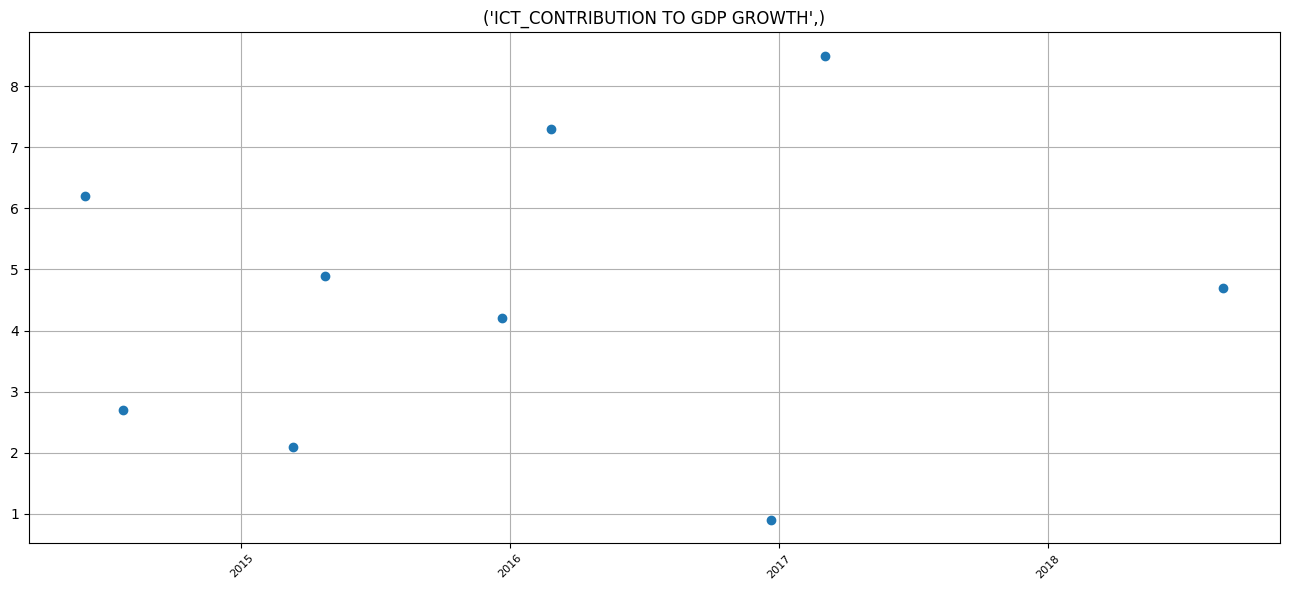

In [70]:
fig, ax0 = plt.subplots(figsize=(13, 6))

#for indx, indicator in enumerate(zip(desired_cols)):
ax0.scatter(X.reshape(-1, 1), y[:, 0])
ax0.set_xticklabels(d0.index.tolist())
ax0.tick_params(axis='x', rotation=45, labelsize=8)
ax0.set_title(indicator)
ax0.grid(True)
plt.tight_layout()

In [38]:
indicator_coef

{('GROWTH_AGRIC',): array([0.02445095]),
 ('GROWTH_EDUC',): array([0.02554795]),
 ('GROWTH_ELECTRICITY',): array([-0.0996166]),
 ('GROWTH_FINANCE_INSURANCE',): array([0.26029519]),
 ('GROWTH_HSW',): array([-0.02335173]),
 ('GROWTH_MANUFACTURING',): array([-0.06501784]),
 ('GROWTH_TRADE',): array([0.01990116]),
 ('GROWTH_TRANSPORT_STORAGE',): array([0.03778561]),
 ('GROWTH_GDP',): array([0.00446557]),
 ('ICT_SHARE IN GDP',): array([0.03320923]),
 ('ICT_SHARE IN SERVICE SECTOR',): array([0.08767696]),
 ('ICT_CONTRIBUTION TO SERVICE GROWTH',): array([0.06565182]),
 ('ICT_CONTRIBUTION TO GDP GROWTH',): array([0.02520494])}

In [ ]:
# Manova Analysis
